# RFP: Betting on the Bachelor

## Project Overview
You are invited to submit a proposal that answers the following question:

### Who will win season 29 of the Bachelor?

*All proposals must be submitted by **1/15/25 at 11:59 PM**.*

## Required Proposal Components

### 1. Data Description
In the code cell below, read in the data you plan on using to train and test your model. Call `info()` once you have read the data into a dataframe. Consider using some or all of the following sources:
- [Scrape Fandom Wikis](https://bachelor-nation.fandom.com/wiki/The_Bachelor) or [the official Bachelor website]('https://bachelornation.com/shows/the-bachelor/')
- [Ask ChatGPT to genereate it](https://chatgpt.com/)
- [Read in csv files like this](https://www.kaggle.com/datasets/brianbgonz/the-bachelor-contestants?select=contestants.csv)

*Note, a level 5 dataset contains at least 1000 rows of non-null data. A level 4 contains at least 500 rows of non-null data.*

In [1]:
import requests
import seaborn as sns
import pandas as pd
import time
from bs4 import BeautifulSoup
pastsets = {'Name':[], 
           'Age': [],
            'Home town':[],
           'Occupation': [],
           'Outcome': [],
           'Season': []}
current = {'Name':[], 
           'Age': [],
           'Home town':[],
           'Occupation': [],
           'Outcome': [],
          'Place': []}
pain=[]
doublepain=[]
for i in range(1, 28):
    url=f'https://en.wikipedia.org/wiki/The_Bachelor_(American_TV_series)_season_{i}'
    response=requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    for li in soup.find_all('li'):
        li.decompose()
    for sup_tag in soup.find_all('sup', class_='reference'):
        sup_tag.decompose()
    for p in soup.find_all('p'):
        p.decompose()
    try:
        
        table = soup.find('table', {'class': 'wikitable sortable'})
        if table:
            rows = table.find_all('tr')[1:]

            for tr in rows:
                cells = tr.find_all('td')
                
                if cells:  
                    name = cells[0].text.strip() if len(cells) > 0 else "N/A"
                    age = cells[1].text.strip() if len(cells) > 1 else "N/A"
                    hometown = cells[2].text.strip() if len(cells) > 2 else "N/A"
                    occupation = cells[3].text.strip() if len(cells) > 3 else "N/A"
                    outcome = cells[4].text.strip() if len(cells) > 4 else "N/A"
                    place = cells[5].text.strip() if len(cells) > 5 else "N/A"
                    if name == 'N/A':
                        continue
                    else:
                        pastsets['Name'].append(name)
                        pastsets['Age'].append(age)
                        pastsets['Home town'].append(hometown)
                        pastsets['Occupation'].append(occupation)
                        pastsets['Outcome'].append(outcome)
                        pastsets['Season'].append(i)
            time.sleep(1)
        else:
            print("no table")
    except:
        pain.append(url)
        print(pain)
    
df = pd.DataFrame(pastsets)
df.info()
print("pains:", pain)
df.head()
# Don't forget to call info()!

no table
no table
no table
no table
no table
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        613 non-null    object
 1   Age         613 non-null    object
 2   Home town   613 non-null    object
 3   Occupation  613 non-null    object
 4   Outcome     613 non-null    object
 5   Season      613 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 28.9+ KB
pains: []


,Name,Age,Home town,Occupation,Outcome,Season
0,Amanda Marsh,23,"Chanute, Kansas",Event Planner,Winner,1
1,Trista Rehn,29,"St. Louis, Missouri",Miami Heat Dancer,Runner-up,1
2,Shannon Oliver,24,"Dallas, Texas",Financial Management Consultant,Week 5,1
3,Kimberly Karels,24,"Tempe, Arizona",Nanny,Week 4,1
4,Cathy Grimes,22,"Terre Haute, Indiana",Graduate Student,Week 3,1


In [2]:
for i in range(1, 9):
    url=f'https://en.wikipedia.org/wiki/The_Bachelor_(Australian_TV_series)_season_{i}'
    response=requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    for li in soup.find_all('li'):
        li.decompose()
    for sup_tag in soup.find_all('sup', class_='reference'):
        sup_tag.decompose()
    for p in soup.find_all('p'):
        p.decompose()
    try:
        
        table = soup.find('table', {'class': 'wikitable'})
        if table:
            rows = table.find_all('tr')[1:]

            for tr in rows:
                cells = tr.find_all('td')
                
                if cells:  
                    name = cells[0].text.strip() if len(cells) > 0 else "N/A"
                    age = cells[1].text.strip() if len(cells) > 1 else "N/A"
                    hometown = cells[2].text.strip() if len(cells) > 2 else "N/A"
                    occupation = cells[3].text.strip() if len(cells) > 3 else "N/A"
                    outcome = cells[4].text.strip() if len(cells) > 4 else "N/A"
                    if name == 'N/A':
                        continue
                    else:
                        pastsets['Name'].append(name)
                        pastsets['Age'].append(age)
                        pastsets['Home town'].append(hometown)
                        pastsets['Occupation'].append(occupation)
                        pastsets['Outcome'].append(outcome)
                        pastsets['Season'].append(i+10)
            time.sleep(1)
        else:
            print("no table")
    except:
        pain.append(url)
        print(pain)
    
df = pd.DataFrame(pastsets)
df.info()
print("pains:", pain)
df.head()
print(f'\n{df.tail()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        816 non-null    object
 1   Age         816 non-null    object
 2   Home town   816 non-null    object
 3   Occupation  816 non-null    object
 4   Outcome     816 non-null    object
 5   Season      816 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 38.4+ KB
pains: []

                    Name Age                 Home town  \
811        Georgie Glass  32          Hobart, Tasmania   
812      Leilani Vakaahi  27  Forster, New South Wales   
813  Marlaina McPhillips  31       Melbourne, Victoria   
814         Nadine Kodsi  30       Melbourne, Victoria   
815          Paige Royal  31       Melbourne, Victoria   

                  Occupation    Outcome  Season  
811          Project Manager  Episode 3      18  
812     Partnerships Manager        N/A      18  
813  Fundraisin

In [3]:

for i in range(1, 3):
    url=f'https://en.wikipedia.org/wiki/The_Bachelor_Canada_season_{i}'
    response=requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    for li in soup.find_all('li'):
        li.decompose()
    for sup_tag in soup.find_all('sup', class_='reference'):
        sup_tag.decompose()
    for p in soup.find_all('p'):
        p.decompose()
    try:
        
        table = soup.find('table', {'class': 'wikitable'})
        if table:
            rows = table.find_all('tr')[1:]

            for tr in rows:
                cells = tr.find_all('td')
                
                if cells:  
                    name = cells[0].text.strip() if len(cells) > 0 else "N/A"
                    age = cells[1].text.strip() if len(cells) > 1 else "N/A"
                    hometown = cells[2].text.strip() if len(cells) > 2 else "N/A"
                    occupation = cells[3].text.strip() if len(cells) > 3 else "N/A"
                    outcome = cells[4].text.strip() if len(cells) > 4 else "N/A"
                    if name == 'N/A':
                        continue
                    else:
                        pastsets['Name'].append(name)
                        pastsets['Age'].append(age)
                        pastsets['Home town'].append(hometown)
                        pastsets['Occupation'].append(occupation)
                        pastsets['Outcome'].append(outcome)
                        pastsets['Season'].append(i+20)
            time.sleep(1)
        else:
            print("no table")
    except:
        pain.append(url)
        print(pain)
    
df = pd.DataFrame(pastsets)
df.info()
print("pains:", pain)
df.head()
print(f'\n{df.tail()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        864 non-null    object
 1   Age         864 non-null    object
 2   Home town   864 non-null    object
 3   Occupation  864 non-null    object
 4   Outcome     864 non-null    object
 5   Season      864 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 40.6+ KB
pains: []

              Name Age                                   Home town  \
859  Kelsey Palmer  28                            Calgary, Alberta   
860  Raelee Fedyna  26                            Calgary, Alberta   
861  Ritiuska Leon  33  Puerto Ordaz, Venezuela / Calgary, Alberta   
862   Sarah Barber  31                     St. Catharines, Ontario   
863  Sharan Garcha  23                 Vancouver, British Columbia   

                  Occupation    Outcome  Season  
859                Sommelier  Episode 1    

In [4]:

for i in range(1, 3):
    url=f'https://en.wikipedia.org/wiki/The_Bachelor_(Greek_TV_series)_season_{i}'
    response=requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    for li in soup.find_all('li'):
        li.decompose()
    for sup_tag in soup.find_all('sup', class_='reference'):
        sup_tag.decompose()
    for p in soup.find_all('p'):
        p.decompose()
    try:
        
        table = soup.find('table', {'class': 'wikitable'})
        if table:
            rows = table.find_all('tr')[1:]

            for tr in rows:
                cells = tr.find_all('td')
                
                if cells:  
                    name = cells[0].text.strip() if len(cells) > 0 else "N/A"
                    age = cells[1].text.strip() if len(cells) > 1 else "N/A"
                    hometown = cells[2].text.strip() if len(cells) > 2 else "N/A"
                    occupation = cells[3].text.strip() if len(cells) > 3 else "N/A"
                    outcome = cells[4].text.strip() if len(cells) > 4 else "N/A"
                    if name == 'N/A':
                        continue
                    else:
                        pastsets['Name'].append(name)
                        pastsets['Age'].append(age)
                        pastsets['Home town'].append(hometown)
                        pastsets['Occupation'].append(occupation)
                        pastsets['Outcome'].append(outcome)
                        pastsets['Season'].append(i+30)
            time.sleep(1)
        else:
            print("no table")
    except:
        pain.append(url)
        print(pain)
    
df = pd.DataFrame(pastsets)
df.info()
print("pains:", pain)
df.head()
print(f'\n{df.tail()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        911 non-null    object
 1   Age         911 non-null    object
 2   Home town   911 non-null    object
 3   Occupation  911 non-null    object
 4   Outcome     911 non-null    object
 5   Season      911 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 42.8+ KB
pains: []

                  Name Age Home town                            Occupation  \
906  Irene Katsigianni  19    Athens  Primary and Community Health Student   
907    Valeria Merakou  28    Athens                                Author   
908             Laoura  19    Rhodes                             Bartender   
909        Dora Kinali  22    Serres                                Dancer   
910   Lena Nikolarakou  22   Trikala                              Aclogist   

    Outcome  Season  
906  Week 1      32  
9

In [5]:

for i in range(1, 3):
    url=f'https://en.wikipedia.org/wiki/The_Bachelor_New_Zealand_season_{i}'
    response=requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    for li in soup.find_all('li'):
        li.decompose()
    for sup_tag in soup.find_all('sup', class_='reference'):
        sup_tag.decompose()
    for p in soup.find_all('p'):
        p.decompose()
    try:
        
        table = soup.find('table', {'class': 'wikitable'})
        if table:
            rows = table.find_all('tr')[1:]

            for tr in rows:
                cells = tr.find_all('td')
                
                if cells:  
                    name = cells[0].text.strip() if len(cells) > 0 else "N/A"
                    age = cells[1].text.strip() if len(cells) > 1 else "N/A"
                    hometown = cells[2].text.strip() if len(cells) > 2 else "N/A"
                    occupation = cells[3].text.strip() if len(cells) > 3 else "N/A"
                    outcome = cells[4].text.strip() if len(cells) > 4 else "N/A"
                    if name == 'N/A':
                        continue
                    else:
                        pastsets['Name'].append(name)
                        pastsets['Age'].append(age)
                        pastsets['Home town'].append(hometown)
                        pastsets['Occupation'].append(occupation)
                        pastsets['Outcome'].append(outcome)
                        pastsets['Season'].append(i+40)
            time.sleep(1)
        else:
            print("no table")
    except:
        pain.append(url)
        print(pain)
    
df = pd.DataFrame(pastsets)
df.info()
print("pains:", pain)
df.head()
print(f'\n{df.tail()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 0 to 954
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        955 non-null    object
 1   Age         955 non-null    object
 2   Home town   955 non-null    object
 3   Occupation  955 non-null    object
 4   Outcome     955 non-null    object
 5   Season      955 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 44.9+ KB
pains: []

                                 Name Age     Home town  \
950  Metotisi "Metz" Komiti-Faalavaau  28      Auckland   
951                     Catherine Lum  26      Auckland   
952                        Emily Rose  33      Auckland   
953                       Freya Jones  26  Christchurch   
954                      Harmony Moki  27      Auckland   

                     Occupation         Outcome  Season  
950               Administrator  Quit Episode 3      42  
951  Ambulance customer service       Episo

In [6]:

for i in range(1):
    url="https://en.wikipedia.org/wiki/The_Bachelor_(Brazilian_TV_series)"
    response=requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    for li in soup.find_all('li'):
        li.decompose()
    for sup_tag in soup.find_all('sup', class_='reference'):
        sup_tag.decompose()
    for p in soup.find_all('p'):
        p.decompose()
    try:
        
        table = soup.find('table', {'class': 'wikitable'})
        if table:
            rows = table.find_all('tr')[1:]

            for tr in rows:
                cells = tr.find_all('td')
                
                if cells:  
                    name = cells[0].text.strip() if len(cells) > 0 else "N/A"
                    age = cells[1].text.strip() if len(cells) > 1 else "N/A"
                    hometown = cells[2].text.strip() if len(cells) > 2 else "N/A"
                    occupation = cells[3].text.strip() if len(cells) > 3 else "N/A"
                    outcome = cells[4].text.strip() if len(cells) > 4 else "N/A"
                    if name == 'N/A':
                        continue
                    else:
                        pastsets['Name'].append(name)
                        pastsets['Age'].append(age)
                        pastsets['Home town'].append(hometown)
                        pastsets['Occupation'].append(occupation)
                        pastsets['Outcome'].append(outcome)
                        pastsets['Season'].append(i+50)
            time.sleep(1)
        else:
            print("no table")
    except:
        pain.append(url)
        print(pain)
    
df = pd.DataFrame(pastsets)
df.info()
print("pains:", pain)
df.head()
print(f'\n{df.tail()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        980 non-null    object
 1   Age         980 non-null    object
 2   Home town   980 non-null    object
 3   Occupation  980 non-null    object
 4   Outcome     980 non-null    object
 5   Season      980 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 46.1+ KB
pains: []

                Name Age              Home town                Occupation  \
975    Letícia Mello  20  São Bernardo do Campo  Public relations student   
976  Michelle Mignon  26                Uberaba                     Model   
977     Nanny Correa  30           Bom Despacho                        DJ   
978    Suzy Pianista  33              São Paulo                   Pianist   
979  Viviane Pereira  27         Jaraguá do Sul         Real estate agent   

    Outcome  Season  
975     N/A      50  
976    

In [7]:

for i in range(5,6):
    url=f"https://en.wikipedia.org/wiki/The_Bachelor_(British_TV_series)_series_{i}"
    response=requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    for li in soup.find_all('li'):
        li.decompose()
    for sup_tag in soup.find_all('sup', class_='reference'):
        sup_tag.decompose()
    for p in soup.find_all('p'):
        p.decompose()
    try:
        
        table = soup.find('table', {'class': 'wikitable'})
        if table:
            rows = table.find_all('tr')[1:]

            for tr in rows:
                cells = tr.find_all('td')
                
                if cells:  
                    name = cells[0].text.strip() if len(cells) > 0 else "N/A"
                    age = cells[1].text.strip() if len(cells) > 1 else "N/A"
                    hometown = cells[2].text.strip() if len(cells) > 2 else "N/A"
                    occupation = cells[3].text.strip() if len(cells) > 3 else "N/A"
                    outcome = cells[4].text.strip() if len(cells) > 4 else "N/A"
                    if name == 'N/A':
                        continue
                    else:
                        pastsets['Name'].append(name)
                        pastsets['Age'].append(age)
                        pastsets['Home town'].append(hometown)
                        pastsets['Occupation'].append(occupation)
                        pastsets['Outcome'].append(outcome)
                        pastsets['Season'].append(i+70)
            time.sleep(1)
        else:
            print("no table")
    except:
        pain.append(url)
        print(pain)
    
df = pd.DataFrame(pastsets)
df.info()
print("pains:", pain)
df.head()
print(f'\n{df.tail()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        1004 non-null   object
 1   Age         1004 non-null   object
 2   Home town   1004 non-null   object
 3   Occupation  1004 non-null   object
 4   Outcome     1004 non-null   object
 5   Season      1004 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 47.2+ KB
pains: []

               Name Age      Home town              Occupation    Outcome  \
999     Rachel Boon  24         Surrey             Childminder  Episode 1   
1000   Rebecca Rock  25  Hertfordshire          Hair Colourist  Episode 1   
1001    Sophia Port  25         London              Finance PA  Episode 1   
1002  Sarah Stewart  21     Nottingham                 Student  Episode 1   
1003  Victoria Ebel  23      Guildford  Health Care Technician  Episode 1   

      Season  
999       75  
1000      75  
1001

### 2. Training Your Model
In the cell seen below, write the code you need to train a linear regression model. Make sure you display the equation of the plane that best fits your chosen data at the end of your program. 

*Note, level 5 work trains a model using only the standard Python library and Pandas. A level 5 model is trained with at least two features, where one of the features begins as a categorical value (e.g. occupation, hometown, etc.). A level 4 uses external libraries like scikit or numpy.*

In [8]:
print(df['Outcome'].unique())


['Winner' 'Runner-up' 'Week 5' 'Week 4' 'Week 3' 'Week 2' 'Week 1'
 'Week 6' 'Week 2 (Quit)' 'Week 7' 'N/A' 'Week 8' 'Co-runners-up' '9'
 'Runner-Up' '12' '15 (quit)' '8' '15 (DQ)' 'Week 9' '6' '11' '17 (quit)'
 '8 (DQ)' '13' '16 (quit)' '16' '19 (quit)' '6 (quit)' '18' '15' '' '14'
 '21 (quit)' '22' '7 (quit)' '10' '17' '3' '7' '10 (quit)' '13 (quit)'
 '19' '17–19' '20' 'Runner-Up(Week 10)' '29 (quit)' '30' 'Episode 12'
 'Episode 11' 'Episode 10' 'Episode 9' 'Episode 8' 'Episode 7' 'Episode 6'
 'Episode 5' 'Episode 4' 'Episode 3' 'Episode 2' 'Episode 2 (Quit)'
 'Episode 1' 'Episode 19' 'Episode 18' 'Episode 16' 'Episode 15'
 'Episode 14' 'Episode 13' 'Episode 4 (Quit)' 'Episode 9 (Quit)'
 'Episode 7 (quit)' 'Episode 1 (quit)' 'Episode 10 (quit)'
 'Episode 15 (quit)' 'Episode 8 (quit)' 'Episode 10 (Quit)'
 'Episode 5 (quit)' 'Episode 4 (quit)' 'Quit Episode 10' 'Quit Episode 3'
 'Quit Episode 1' 'Quit Episode 8' 'Week 12' 'Week 11' 'Week 10']


In [9]:
print(df['Occupation'].unique())
occupationnumber= {'occupation':[], 'number':[]}
for i, occupation in enumerate(df['Occupation'].unique()):
    occupationnumber['occupation'].append(occupation)
    occupationnumber['number'].append(i)
occupationnumber=pd.DataFrame(occupationnumber)
occupationnumber.head()

['Event Planner' 'Miami Heat Dancer' 'Financial Management Consultant'
 'Nanny' 'Graduate Student' 'Attorney' 'Actress'
 'Commercial Real Estate Agent' 'Special Ed. Teacher'
 'Production Coordinator' 'Hooters Waitress' 'Power Tool Sales Rep.'
 'Photographer' 'Business Development Director' 'Neuropsychologist'
 'Doctor' 'Bar Manager' 'Retail Manager' 'Advertising Executive'
 'Insurance Representative' '6th Grade Teacher' 'Technology Specialist'
 'School Psychologist' 'College Student' 'Executive Recruiter'
 'Registered Nurse' 'Flight Attendant' 'Assistant Financial Advisor'
 'Marriage Therapy Trainee' 'Airline Supervisor' 'Graphic Artist'
 'Radio Sales' 'Publications Quality Control' 'Strategic Planning Analyst'
 'Psychologist' '3rd Grade Teacher' 'Radiological Technologist'
 'Interior Designer' 'Paralegal' 'Former NBA Cheerleader'
 '1st Grade Teacher' 'Communications Specialist' 'Student'
 'General Contractor' 'Architect Designer' 'Model'
 'Pharmaceutical Salesperson' 'Prosthetic Techn

,occupation,number
0,Event Planner,0
1,Miami Heat Dancer,1
2,Financial Management Consultant,2
3,Nanny,3
4,Graduate Student,4


In [10]:
df['occnum']=None
for i, player in df.iterrows():
    occupation = player['Occupation']
    assignment = occupationnumber[occupationnumber['occupation'] == occupation]
    df.loc[i, 'occnum']=assignment['number'].values[0]
df['occnum']=pd.to_numeric(df['occnum'], errors='coerce')
print(f'\nInfo')
df.info()
print(f'\nHead')
df.head()



Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        1004 non-null   object
 1   Age         1004 non-null   object
 2   Home town   1004 non-null   object
 3   Occupation  1004 non-null   object
 4   Outcome     1004 non-null   object
 5   Season      1004 non-null   int64 
 6   occnum      1004 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 55.0+ KB

Head


,Name,Age,Home town,Occupation,Outcome,Season,occnum
0,Amanda Marsh,23,"Chanute, Kansas",Event Planner,Winner,1,0
1,Trista Rehn,29,"St. Louis, Missouri",Miami Heat Dancer,Runner-up,1,1
2,Shannon Oliver,24,"Dallas, Texas",Financial Management Consultant,Week 5,1,2
3,Kimberly Karels,24,"Tempe, Arizona",Nanny,Week 4,1,3
4,Cathy Grimes,22,"Terre Haute, Indiana",Graduate Student,Week 3,1,4


In [11]:
import math

print(df['Outcome'].unique())

df['outnum'] = None

df['Outcome'] = df['Outcome'].str.lower()

for i, player in df.iterrows():
    outcome = player['Outcome']
    outcome = outcome.replace("week ", "")
    outcome = outcome.replace("(quit)", "")
    outcome = outcome.replace("(dq)", "")
    outcome = outcome.replace("(DQ)", "")
    outcome = outcome.replace("(Quit)", "")
    outcome = outcome.replace("episode", "")
    outcome = outcome.replace("quit", "")
    outcome = outcome.replace(" ", "")

    if "in" in outcome:
        df.loc[i, 'outnum'] = 0
    elif "un" in outcome:
        df.loc[i, 'outnum'] = 0
    elif 'n/a' in outcome:
        df.loc[i, 'outnum'] = 1
    elif outcome == '':
        df.loc[i, 'outnum'] = 1
    elif outcome == '17–19':
        df.loc[i, 'outnum'] = 17

    else:
        df.loc[i, 'outnum'] = float(outcome)  

df['outnum'] = pd.to_numeric(df['outnum'], errors='coerce')

seasonmax = df.groupby('Season')['outnum'].max().reset_index()

for i, player in df.iterrows():
    season = player['Season']
    outcome = player['Outcome']
    max_outnum = seasonmax.loc[seasonmax['Season'] == season, 'outnum'].values[0]

    if "winner" in outcome:
        df.loc[i, 'outnum'] = max_outnum + 2
        df.loc[i, 'outnum'] = math.log(df.loc[i, 'outnum'] + 1)

    elif "run" in outcome:
        df.loc[i, 'outnum'] = max_outnum + 1
        df.loc[i, 'outnum'] = math.log(df.loc[i, 'outnum'] + 1)

    else:
        df.loc[i, 'outnum'] = math.log(df.loc[i, 'outnum'] + 1)

df['outnum'] = pd.to_numeric(df['outnum'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

df = df.dropna()

df.head()


['Winner' 'Runner-up' 'Week 5' 'Week 4' 'Week 3' 'Week 2' 'Week 1'
 'Week 6' 'Week 2 (Quit)' 'Week 7' 'N/A' 'Week 8' 'Co-runners-up' '9'
 'Runner-Up' '12' '15 (quit)' '8' '15 (DQ)' 'Week 9' '6' '11' '17 (quit)'
 '8 (DQ)' '13' '16 (quit)' '16' '19 (quit)' '6 (quit)' '18' '15' '' '14'
 '21 (quit)' '22' '7 (quit)' '10' '17' '3' '7' '10 (quit)' '13 (quit)'
 '19' '17–19' '20' 'Runner-Up(Week 10)' '29 (quit)' '30' 'Episode 12'
 'Episode 11' 'Episode 10' 'Episode 9' 'Episode 8' 'Episode 7' 'Episode 6'
 'Episode 5' 'Episode 4' 'Episode 3' 'Episode 2' 'Episode 2 (Quit)'
 'Episode 1' 'Episode 19' 'Episode 18' 'Episode 16' 'Episode 15'
 'Episode 14' 'Episode 13' 'Episode 4 (Quit)' 'Episode 9 (Quit)'
 'Episode 7 (quit)' 'Episode 1 (quit)' 'Episode 10 (quit)'
 'Episode 15 (quit)' 'Episode 8 (quit)' 'Episode 10 (Quit)'
 'Episode 5 (quit)' 'Episode 4 (quit)' 'Quit Episode 10' 'Quit Episode 3'
 'Quit Episode 1' 'Quit Episode 8' 'Week 12' 'Week 11' 'Week 10']


C:\Users\georg\AppData\Local\Temp\ipykernel_17780\3854915055.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.0794415416798357' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i, 'outnum'] = math.log(df.loc[i, 'outnum'] + 1)


,Name,Age,Home town,Occupation,Outcome,Season,occnum,outnum
0,Amanda Marsh,23.0,"Chanute, Kansas",Event Planner,winner,1,0,2.079442
1,Trista Rehn,29.0,"St. Louis, Missouri",Miami Heat Dancer,runner-up,1,1,1.945910
2,Shannon Oliver,24.0,"Dallas, Texas",Financial Management Consultant,week 5,1,2,1.791759
3,Kimberly Karels,24.0,"Tempe, Arizona",Nanny,week 4,1,3,1.609438
4,Cathy Grimes,22.0,"Terre Haute, Indiana",Graduate Student,week 3,1,4,1.386294


In [12]:
"""
df['state']=None
for i, player in df.iterrows():
    state = player['Home town']
    if ", " in state: 
        assignment = state.split(", ")[1] 
    else:
        assignment = 'None'
    df.loc[i, 'state']=assignment
print(f'\nInfo')
df.info()
print(f'\nHead')
df.head()
print(df['state'].unique())
statenumber= {'state':[], 'number':[]}
for i, state in enumerate(df['state'].unique()):
    statenumber['state'].append(state)
    statenumber['number'].append(i)
statenumber=pd.DataFrame(statenumber)
statenumber.head()
df['statnum']=None
for i, player in df.iterrows():
    state = player['state']
    assignment = statenumber[statenumber['state'] == state]
    df.loc[i, 'statnum']=assignment['number'].values[0]
df['statnum']=pd.to_numeric(df['statnum'], errors='coerce')
print(f'\nInfo')
df.info()
print(f'\nHead')
df.head()
"""

'\ndf[\'state\']=None\nfor i, player in df.iterrows():\n    state = player[\'Home town\']\n    if ", " in state: \n        assignment = state.split(", ")[1] \n    else:\n        assignment = \'None\'\n    df.loc[i, \'state\']=assignment\nprint(f\'\nInfo\')\ndf.info()\nprint(f\'\nHead\')\ndf.head()\nprint(df[\'state\'].unique())\nstatenumber= {\'state\':[], \'number\':[]}\nfor i, state in enumerate(df[\'state\'].unique()):\n    statenumber[\'state\'].append(state)\n    statenumber[\'number\'].append(i)\nstatenumber=pd.DataFrame(statenumber)\nstatenumber.head()\ndf[\'statnum\']=None\nfor i, player in df.iterrows():\n    state = player[\'state\']\n    assignment = statenumber[statenumber[\'state\'] == state]\n    df.loc[i, \'statnum\']=assignment[\'number\'].values[0]\ndf[\'statnum\']=pd.to_numeric(df[\'statnum\'], errors=\'coerce\')\nprint(f\'\nInfo\')\ndf.info()\nprint(f\'\nHead\')\ndf.head()\n'

<Axes: xlabel='Age', ylabel='outnum'>

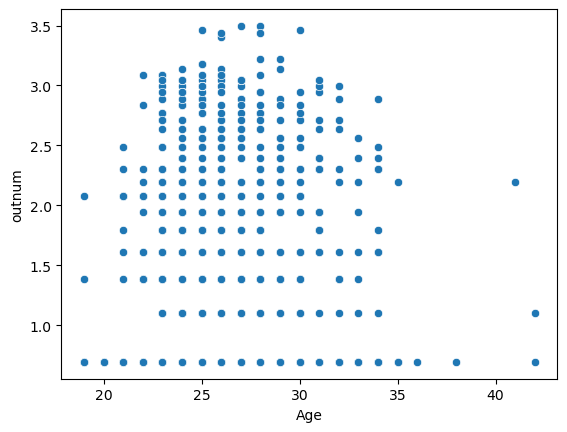

In [13]:
sns.scatterplot(data=df, x='Age', y='outnum')

<Axes: xlabel='occnum', ylabel='outnum'>

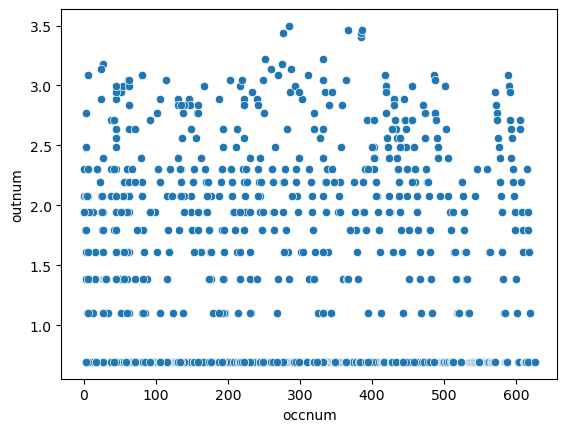

In [14]:
sns.scatterplot(data=df, x='occnum', y='outnum')

In [15]:
#sns.scatterplot(data=df, x='statnum', y='outnum')

In [16]:
import statistics
import random
from tqdm import tqdm
df=df.dropna()


am=statistics.mean(df['Age'])
ast=statistics.stdev(df['Age'])
om=statistics.mean(df['occnum'])
ost=statistics.stdev(df['occnum'])
m1=statistics.mean(df['Age'])/100
print('agemean:',m1)
m2=0

ts=.4
trs=(1-ts)
trdf=df.sample(frac=1-ts,random_state=2442)
tst=df.drop(trdf.index)
trdf.head()
time.sleep(1)
trdf=trdf.dropna()
b=0
trdf['Age_scaled']=trdf['Age'].apply(lambda x:(x-am)/ast)
trdf['occnum_scaled']= trdf['occnum'].apply(lambda x: (x - om) / ost)
m1 = 0.0
m2 = 0.0
b = 0.0

for i in tqdm(range(5000), desc="training", unit="iteration"):
    difference=0

    for j, player in trdf.iterrows(): 
        lr = 0.001/(10^j)

        ypred = b + (m1 * player['Age_scaled']) + (m2 * player['occnum_scaled'])
        yact = player['outnum']
        resid = yact - ypred

        b += lr * resid
        m1 += lr * resid * player['Age_scaled']  
        m2 += lr * resid * player['occnum_scaled']

print(f'M1: {m1} \nM2:{m2} \nB: {b}')
print('\nyact:', yact)
print('ypred:', ypred)
print('resid:', resid)
print(f'\nEquation: y_pred = {b} + {m1}(age) + {m2}(occupation number)')

agemean: 0.26484484484484483


training: 100%|██████████| 5000/5000 [03:57<00:00, 21.05iteration/s]

M1: -0.04824162026061821 
M2:0.13885110783540675 
B: 1.3408798774505084

yact: 1.3862943611198906
ypred: 1.4969866366962168
resid: -0.11069227557632622

Equation: y_pred = 1.3408798774505084 + -0.04824162026061821(age) + 0.13885110783540675(occupation number)


In [17]:


trdf.info()
print('\n')
trdf.head()

<class 'pandas.core.frame.DataFrame'>
Index: 599 entries, 247 to 848
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           599 non-null    object 
 1   Age            599 non-null    float64
 2   Home town      599 non-null    object 
 3   Occupation     599 non-null    object 
 4   Outcome        599 non-null    object 
 5   Season         599 non-null    int64  
 6   occnum         599 non-null    int64  
 7   outnum         599 non-null    float64
 8   Age_scaled     599 non-null    float64
 9   occnum_scaled  599 non-null    float64
dtypes: float64(4), int64(2), object(4)
memory usage: 51.5+ KB




,Name,Age,Home town,Occupation,Outcome,Season,occnum,outnum,Age_scaled,occnum_scaled
247,Britnee Marks,25.0,"Holland, Pennsylvania",Paralegal,week 1,15,38,0.693147,-0.468977,-1.155559
508,Eunice Cho,23.0,"Chicago, Illinois",Flight Attendant,n/a,24,26,0.693147,-1.100815,-1.220444
589,Greer Blitzer,24.0,"Bellaire, Texas",Medical Sales Representative,7,27,139,2.079442,-0.784896,-0.609442
90,Carissa Ilburg,25.0,"Cattaraugus, New York",Attorney,n/a,9,5,0.693147,-0.468977,-1.333993
219,Channy Choch,29.0,"Santa Rosa, California",Mortgage Loan Officer,n/a,14,160,0.693147,0.794699,-0.495894


In [18]:


tst.info()
print('\n')
tst.head()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 1001
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        400 non-null    object 
 1   Age         400 non-null    float64
 2   Home town   400 non-null    object 
 3   Occupation  400 non-null    object 
 4   Outcome     400 non-null    object 
 5   Season      400 non-null    int64  
 6   occnum      400 non-null    int64  
 7   outnum      400 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 28.1+ KB




,Name,Age,Home town,Occupation,Outcome,Season,occnum,outnum
0,Amanda Marsh,23.0,"Chanute, Kansas",Event Planner,winner,1,0,2.079442
2,Shannon Oliver,24.0,"Dallas, Texas",Financial Management Consultant,week 5,1,2,1.791759
3,Kimberly Karels,24.0,"Tempe, Arizona",Nanny,week 4,1,3,1.609438
4,Cathy Grimes,22.0,"Terre Haute, Indiana",Graduate Student,week 3,1,4,1.386294
8,Alexa Jurgielewicz,27.0,"Beverly Hills, California",Special Ed. Teacher,week 2,1,8,1.098612


In [19]:
"""
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
xa = df[['Age', 'occnum']]
ya=df['outnum']

Xa_train, Xa_test, ya_train, ya_test = train_test_split(xa, ya, test_size=0.3, random_state=42)


model = LinearRegression()

model.fit(Xa_train, ya_train)
print("slope:", model.coef_[0])
ya_pred = model.predict(Xa_test)

mse = mean_squared_error(ya_test, ya_pred)

print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("Predictions:", ya_pred)
r2 = r2_score(ya_test, ya_pred)
print(f'R-squared: {r2}')
"""

'\nimport numpy as np\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.metrics import r2_score, mean_squared_error\nfrom sklearn.model_selection import train_test_split\nimport matplotlib.pyplot as plt\nxa = df[[\'Age\', \'occnum\']]\nya=df[\'outnum\']\n\nXa_train, Xa_test, ya_train, ya_test = train_test_split(xa, ya, test_size=0.3, random_state=42)\n\n\nmodel = LinearRegression()\n\nmodel.fit(Xa_train, ya_train)\nprint("slope:", model.coef_[0])\nya_pred = model.predict(Xa_test)\n\nmse = mean_squared_error(ya_test, ya_pred)\n\nprint("Model coefficients:", model.coef_)\nprint("Model intercept:", model.intercept_)\nprint("Mean Squared Error:", mse)\nprint("Predictions:", ya_pred)\nr2 = r2_score(ya_test, ya_pred)\nprint(f\'R-squared: {r2}\')\n'

### 3. Testing Your Model
In the cell seen below, write the code you need to test your linear regression model. 

*Note, a model is considered a level 5 if it achieves at least 60% prediction accuracy or achieves an RMSE of 2 weeks or less.*

In [20]:
print(b, m1, m2)

1.3408798774505084 -0.04824162026061821 0.13885110783540675


In [21]:
def equation(age, occ, b=b, m1=m1, m2=m2):
    ypred=b+(m1*age)+m2(occ)
    return ypred

In [22]:
for i, player in tst.iterrows(): 
    yact = player['outnum']


### 4. Final Answer

In the first cell seen below, state the name of your predicted winner. 
In the second cell seen below, justify your prediction using an evaluation technique like RMSE or percent accuracy.

#### State the name of your predicted winner here.

#### Justify your prediction here.